# Task 1

Using the dataset provided, build a multiple linear regression model to predict stock returns
based on the stock price (\$), P/E ratio, dividend yield (\%), and market cap (billions of \$).
Perform the following steps:
1. Create a scatter plot matrix of the data to observe the relationships between the
independent variables (stock price, P/E ratio, dividend yield, market cap) and the
dependent variable (stock return). (2 points)
2. Formulate a null hypothesis and an alternative hypothesis regarding the relationship
between the independent variables and the dependent variable. (1 point)
3. Estimate the coefficients of the multiple linear regression model using the least squares
method. (1 point)
4. Write the multiple linear regression equation. (1 point)
5. Calculate the R-squared, F-statistic, and p-values for each independent variable to test
the hypothesis and evaluate the model's quality. (2 points)
6. Discuss the results, interpret the coefficients, and make conclusions about the
hypotheses. (4 points)
7. Assess the model's assumptions, such as linearity, normality, multicollinearity, and
homoscedasticity, and discuss the model's limitations. (8 points)
8. Based on the model, predict the stock return for a company with the following features:
Stock Price = $200, P/E Ratio = 45, Dividend Yield = 1.2%, and Market Cap = $35 billion.
(1 point)

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import scipy.stats as stats
import scipy
from statsmodels.stats.diagnostic import het_breuschpagan

import pandas_datareader
import pandas_datareader.data as reader
import datetime as dt
import yfinance as yfin
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
yfin.pdr_override()

In [47]:
df1 = pd.read_csv('/content/part 1. data.csv').iloc[:, 1:]
df1.head()

,Stock Price,P/E Ratio,Dividend Yield,Market Cap,Stock Return
0,79.381258,15.048296,1.870956,10.495274,13.537425
1,107.248490,29.487398,1.871060,13.025350,0.266531
2,59.508983,29.748371,2.052769,27.192751,48.338263
3,56.892746,17.995553,2.666637,15.837167,19.535499
4,158.197056,21.661047,2.879441,21.222265,-1.425241


In [48]:
target = 'Stock Return'
features = df1.drop(columns = target).columns
features

Index(['Stock Price', 'P/E Ratio', 'Dividend Yield', 'Market Cap'], dtype='object')

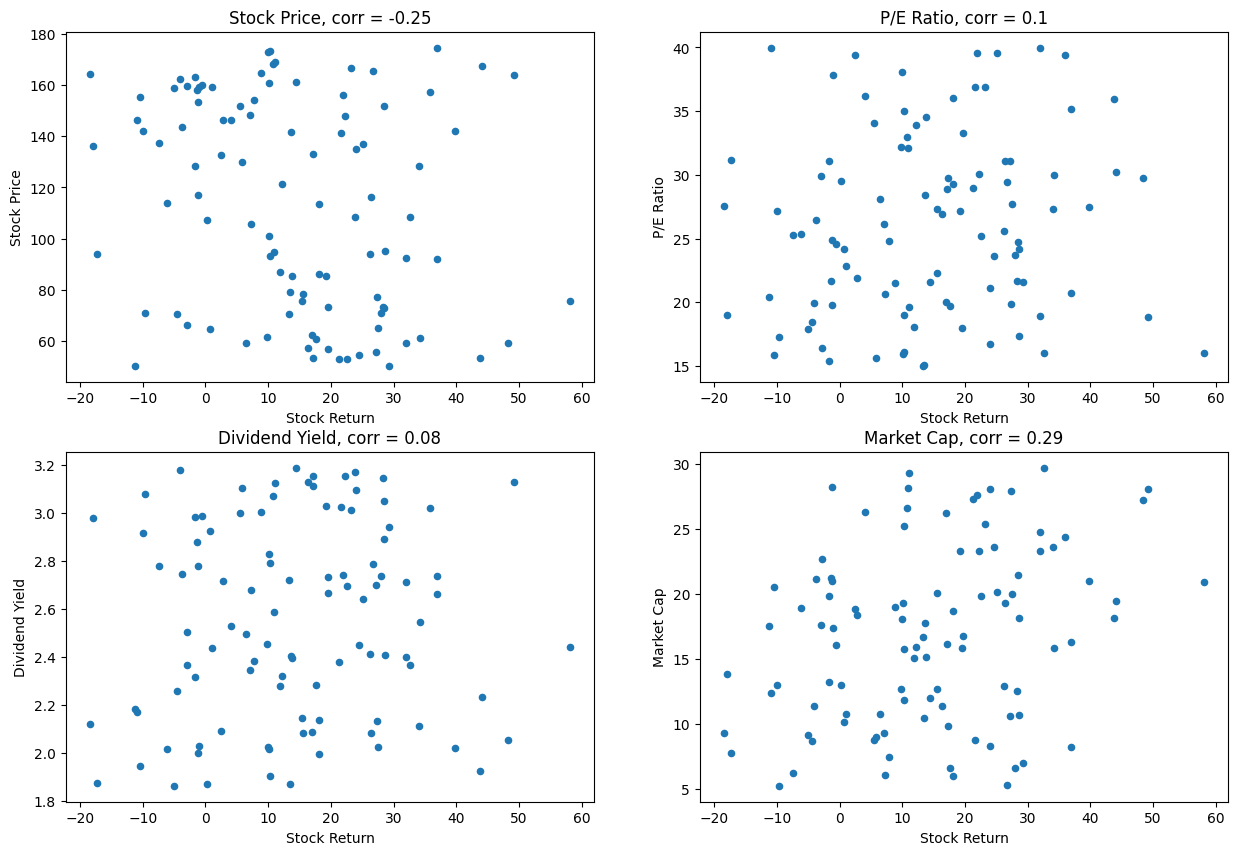

In [49]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
for f, i in zip(features, range(4)):
  df1[[f, target]].plot(kind = 'scatter', x = target, y = f, ax = axs[i // 2, i % 2])
  corr = round(df1.corr().iloc[4].loc[f], 2)
  tit = f + ', corr = ' + str(corr)
  axs[i // 2, i % 2].set_title(tit)

$H_0$: Нет значимой корреляции (связи) между Stock Return и анализируемыми параметрами.

$H_1$: Существует значимая корреляция (связь) между Stock Return и анализируемыми параметрами.


In [50]:
X = df1[features]
Y = df1[target]
X = sm.add_constant(X)
regr_model = sm.OLS(Y, X).fit()
print(regr_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Stock Return   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     6.074
Date:                Sat, 16 Nov 2024   Prob (F-statistic):           0.000214
Time:                        19:51:04   Log-Likelihood:                -407.12
No. Observations:                 100   AIC:                             824.2
Df Residuals:                      95   BIC:                             837.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -8.5254     11.586     -0.

In [51]:
print(f'Stock Return = {round(regr_model.params.iloc[0], 2)}', end = '')
for i in range(1, 5):
  print(f' + {round(regr_model.params.iloc[i], 2)} * {features[i-1]}', end = '')

Stock Return = -8.53 + -0.13 * Stock Price + 0.39 * P/E Ratio + 5.89 * Dividend Yield + 0.74 * Market Cap

$R^2$ и $adjR^2$ - достаточно низкие значения (только около 20% изменения stock return может быть объяснено с помощью анализируемых фичей), скорее всего указывающее на то, что в анализе не учтены другие важные коррелирующие переменные.

p-value для F-статистики сильно меньше 0.05, что означает статистическую значимость регрессии в целом (уверенно отвергаем гипотезу о том, что все коэффициенты =0).

Значение константы в данном случае для нас не очень интерпретируемо, так как нулевые значения для features не имеют смысла.

Коэффициенты для Stock Price и Market Capitalization статистически значимы. Коэффициент для P/E Ratio не является статистически значимым на уровне 5%, однако влезает в уровень значимости 10%. Коэффициент для Dividend Yield не является статистически значимым даже на уровне 10%, но близок к нему.

Shapiro-Wilk Test Statistic: 0.9867753388276934
p-value: 0.4226963128692167



Text(0.5, 1.0, 'Heatmap of features and target')

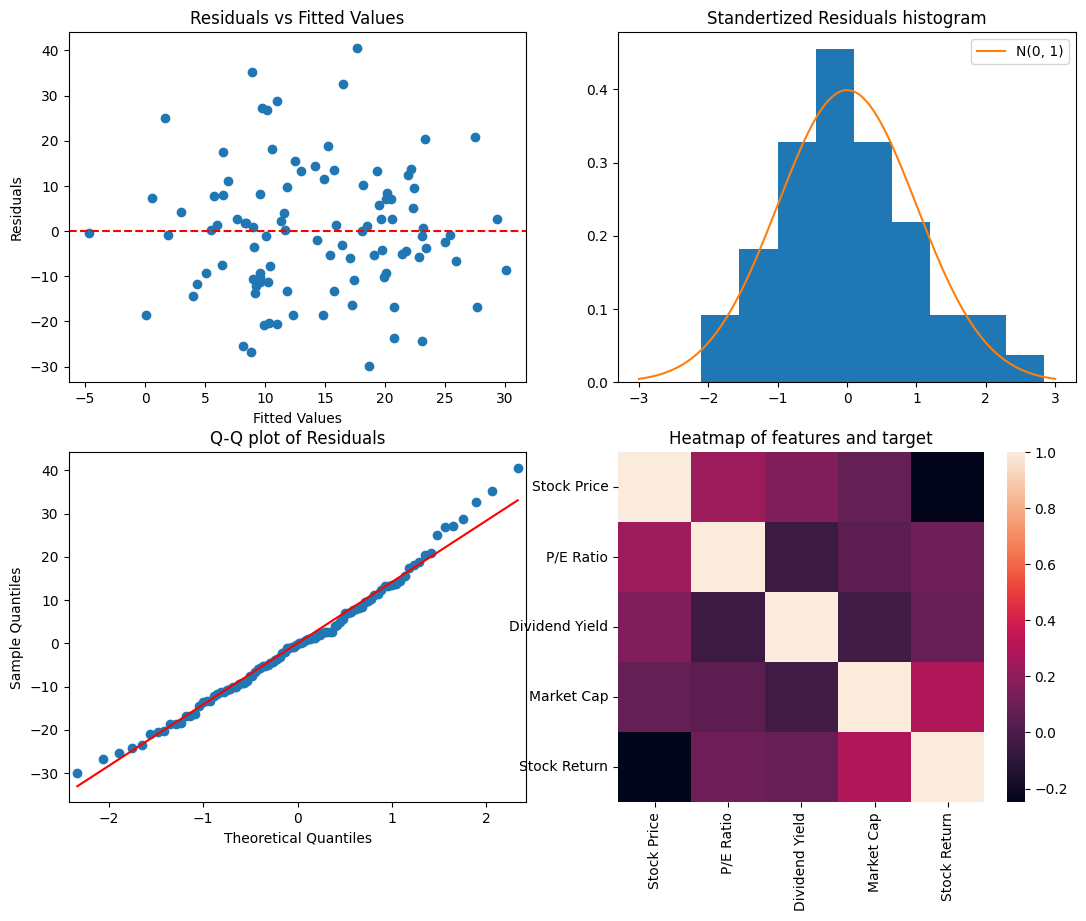

In [64]:
predictions = regr_model.predict(X)
residuals = regr_model.resid
st_residuals = (residuals - residuals.mean())/residuals.std()
shapiro_test = stats.shapiro(residuals)
print("Shapiro-Wilk Test Statistic:", shapiro_test.statistic)
print("p-value:", shapiro_test.pvalue)
print()

fig, axs = plt.subplots(2, 2, figsize=(13, 10))

axs[0, 0].scatter(predictions, residuals)
axs[0, 0].axhline(y=0, color='r', linestyle='--')
axs[0, 0].set_title("Residuals vs Fitted Values")
axs[0, 0].set_xlabel("Fitted Values")
axs[0, 0].set_ylabel("Residuals")

axs[0, 1].hist(st_residuals, bins = 'auto', density=True)
axs[0, 1].set_title("Standertized Residuals histogram")
x = np.linspace(-3, 3, 1000)
axs[0, 1].plot(x, stats.norm.pdf(x, 0, 1), label = 'N(0, 1)')
axs[0, 1].legend()

sm.qqplot(residuals, line='s', ax = axs[1, 0])
axs[1, 0].set_title('Q-Q plot of Residuals')

sns.heatmap(df1.corr(), ax = axs[1, 1])
axs[1, 1].set_title('Heatmap of features and target')



1.Линейность: диаграмма рассеяния выглядит достаточно рандомно-распределенно относительно горизонтальной прямой residuals = 0, откуда можно сделать вывод о линейности модели.

2,3. Нормальность остатков: гисторамма нормированных остатков неплохо описывается стандартным распределением. QQ-plot близок к прямой, однако все же отклоняется от нее для крайних квантилей - распределение сдвинуто в отрицательную сторону, то есть отрицательных отклонений больше, чем положительных. При этом дополнительно проведенный Shapiro-Wilk Test позволяет уверенно отвергнуть нулевую гипотезу о том, что остатки распределены НЕ нормально.

4.Heatmap фичей и таргета выглядит одновременно позитивно и негативно - высоких корреляций между фичами нет, однако нет и между фичами и таргетом:)) Тем не менее, проблемы с мультиколлинеарностью точно нет.



Ограничения модели:
*    Изначально мы действовали в предположениях линейности модели, однако истинная взаимосвязь может не являться таковой.
*    Выбросы могут сильно повлиять на оценки.
*    Наблюдения должны быть независимыми.
*    Пропущенная значимая переменная может привести к искажению результатов. В данном анализе мы могли не включить все релевантные переменные, влияющие на Stock Return что, возможно, и привело к смещенным оценкам.
*    Также мы никак не учитывали то, что Stock Return - это временной ряд. Сезонность, к примеру, может достаточно сильно влиять на стоимость актива.


In [8]:
#Stock Price = $200, P/E Ratio = 45, Dividend Yield = 1.2%, and Market Cap = $35 billion.
nums = [200, 45, 1.2, 35]
print(f'Stock Return = {round(regr_model.params.iloc[0], 2)}', end = '')
for i in range(1, 5):
  print(f' + {round(regr_model.params.iloc[i], 2)} * {nums[i-1]}', end = '')
print(f' = {round((-8.53 + -0.13 * 200 + 0.39 * 45 + 5.89 * 1.2 + 0.74 * 35), 3)}')

Stock Return = -8.53 + -0.13 * 200 + 0.39 * 45 + 5.89 * 1.2 + 0.74 * 35 = 15.988


# Task 2. Preprocessing

Given data, estimate parameters of Gamma distribution:

• 𝑘>0-shape.

• 𝜃>0-scale.

Mean: 4.514982304515785
Variance: 2.179449764477036


<Axes: >

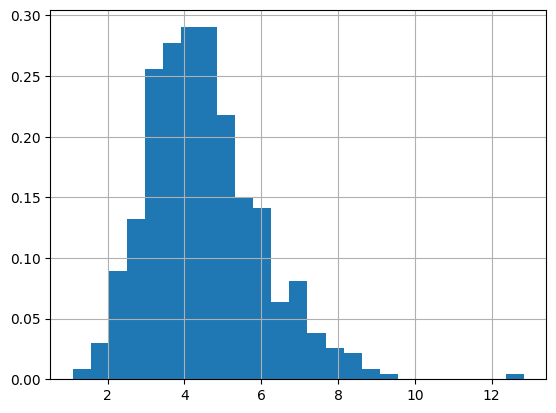

In [65]:
df2 = pd.read_csv('/content/part 2. input.csv')
df2 = df2[df2.columns[0]].rename('gamma')

print(f'Mean: {df2.mean()}')
print(f'Variance: {df2.var()}')

df2.hist(bins = 'auto', density = True)

Можно прикинуть, что $k \approx 9$, $\theta \approx 0.5$. С этих значений можно начать оптимизироваться

$$
\hat{k}, \hat{\theta} = \arg \max_{k, \theta} \frac{1}{N} \sum_{n=1}^{N} \ln \left( \frac{x_n^{k-1} e^{-\frac{x_n}{\theta}}}{\Gamma(k) \theta^{k}} \right) =
$$

$$
= \arg \max_{k, \theta} \frac{1}{N} \sum_{n=1}^{N} \left( (k-1) \ln(x_n) - \frac{x_n}{\theta} - \ln(\Gamma(k)) - k \ln(\theta) \right) =
$$

$$
= \arg \max_{k, \theta} \left( \frac{k-1}{N} \sum_{n=1}^{N} \ln(x_n) - \frac{1}{N \theta} \sum_{n=1}^{N} x_n - ln(\Gamma(k)) - k \ln(\theta) \right) =
$$

$$
= \arg \max_{k, \theta} \left( kL - \frac{S}{ \theta} - ln(\Gamma(k)) - k \ln(\theta) \right),
$$

$$
= \arg \min_{k, \theta} \left(- kL + \frac{S}{ \theta} + ln(\Gamma(k)) + k \ln(\theta) \right),
$$

где
$$L = \frac{\sum_{n=1}^{N} \ln(x_n)}{N},\;\; S = \frac{\sum_{n=1}^{N} x_n}{N}
$$



Используем формулу Стирлинга:

$$
\ln \Gamma(n + 1) = \ln n! \approx n \ln n - n + \frac{ln(2\pi n)}{2}
$$

$$
\hat{k}, \hat{\theta} = \arg \max_{k, \theta} \left( kL - \frac{S}{ \theta} - (k-1)ln(k) + (k-1) - \frac{ln(2\pi (k-1))}{2}- k \ln(\theta) \right) =
$$

$$
= \arg \max_{k, \theta} \left( kL - \frac{S}{ \theta} - (k-1)ln(k) + k - \frac{ln(k-1)}{2}- k \ln(\theta) \right) =
$$

$$
= \arg \min_{k, \theta} \left(- kL + \frac{S}{ \theta} + (k-1)ln(k) - k + \frac{ln(k-1)}{2} + k \ln(\theta) \right)
$$

In [66]:
S = df2.mean()
L = np.log(df2).mean()
print(f'S = {S}, L = {L}')

S = 4.514982304515785, L = 1.4544518507143103


In [68]:
def func(x, S, L):
  k = x[0]
  t = x[1]
  return S/t - k*L + scipy.special.loggamma(k) + k*np.log(t)
result = scipy.optimize.minimize(func, x0 = [9, 0.5], args = (S, L), method = 'SLSQP')

print(*result.x)

9.60542165126345 0.47002814068070325


In [71]:
def func_approx(x, S, L):
  k = x[0]
  t = x[1]
  return S/t - k*L + (k-1)*np.log(k) - k + np.log(k-1)/2 + k*np.log(t)
result_approx = scipy.optimize.minimize(func_approx, x0 = [9, 0.5], args = (S, L), method = 'SLSQP')
print(*result_approx.x)

8.11819817868127 0.5561339824512258


Самопроверка после проведенной оптимизации:

Estimated shape parameter (k): 9.606625476854026
Estimated scale parameter (theta): 0.46998629387541707
My shape parameter (k): 9.60542165126345
My scale parameter (theta): 0.47002814068070325


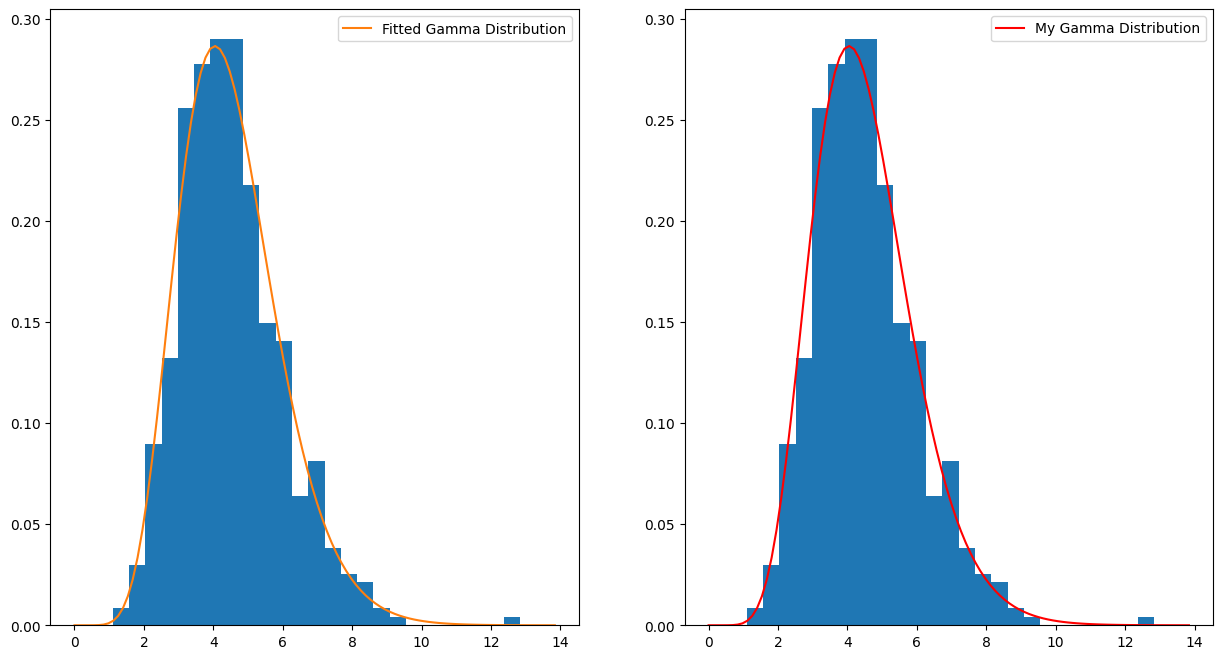

In [59]:
shape, loc, scale = stats.gamma.fit(df2, floc=0)

print(f"Estimated shape parameter (k): {shape}")
print(f"Estimated scale parameter (theta): {scale}")

print(f"My shape parameter (k): 9.60542165126345")
print(f"My scale parameter (theta): 0.47002814068070325")

x = np.linspace(0, max(df2) + 1, 100)
pdf_fitted = stats.gamma.pdf(x, a=shape, loc=0, scale=scale)
pdf_my_fitted = stats.gamma.pdf(x, a=9.60542165126345, loc=0, scale=0.47002814068070325)

fig, axs = plt.subplots(1, 2, figsize=(15, 8))
axs[0].hist(df2, bins='auto', density=True)
axs[0].plot(x, pdf_fitted, label='Fitted Gamma Distribution')
axs[0].legend()

axs[1].hist(df2, bins='auto', density=True)
axs[1].plot(x, pdf_my_fitted, label='My Gamma Distribution', color = 'red')
axs[1].legend()

# Task 3.

Perform a Style Analysis on Berkshire Pathways Stock (BRK-A) between 2000
and 2024.

• Use Fama-Fench Factors (Market, Value and Size) and describe the investing style.• What's Buffet's Alpha? Is the result statistically significant?

• Show a rolling yearly style shift of BRK-A.

Hint: perform Fama-French regression analysis every year, shifting the rolling window to the
current date.

In [39]:
end = dt.date(2024,9,30)
start = dt.date(1999, 12, 31)
ticker = 'BRK-A'

monthly_returns = reader.get_data_yahoo(ticker, start, end)['Adj Close']
monthly_returns = monthly_returns.resample('M').ffill().pct_change().dropna()
monthly_returns.rename(ticker, inplace = True)
monthly_returns.head()

[*********************100%%**********************]  1 of 1 completed


,BRK-A
Date,
2000-01-31,-0.087344
2000-02-29,-0.140625
2000-03-31,0.300000
2000-04-30,0.036713
2000-05-31,-0.011804


In [40]:
market_returns = pandas_datareader.famafrench.FamaFrenchReader('F-F_Research_Data_Factors',start,end).read()[0][1:]/100
monthly_returns.index = market_returns.copy().index
market_returns.head()

,Mkt-RF,SMB,HML,RF
Date,,,,
2000-01,-0.0474,0.0577,-0.0188,0.0041
2000-02,0.0245,0.2136,-0.0959,0.0043
2000-03,0.0520,-0.1720,0.0813,0.0047
2000-04,-0.0640,-0.0668,0.0726,0.0046
2000-05,-0.0442,-0.0605,0.0475,0.0050


In [41]:
excess_returns = pd.merge(market_returns,monthly_returns,on='Date')
excess_returns['(BRK-A)-RF'] = excess_returns['BRK-A'] - excess_returns['RF']
excess_returns.head()

,Mkt-RF,SMB,HML,RF,BRK-A,(BRK-A)-RF
Date,,,,,,
2000-01,-0.0474,0.0577,-0.0188,0.0041,-0.087344,-0.091444
2000-02,0.0245,0.2136,-0.0959,0.0043,-0.140625,-0.144925
2000-03,0.0520,-0.1720,0.0813,0.0047,0.300000,0.295300
2000-04,-0.0640,-0.0668,0.0726,0.0046,0.036713,0.032113
2000-05,-0.0442,-0.0605,0.0475,0.0050,-0.011804,-0.016804


The Fama-French Model:

 $$
R(t)-R F(t)=\alpha+\beta_1 Mkt\text{-}RF(t) + \beta_2 S M B(t)+\beta_3 H M L(t)+\varepsilon(t)
$$

In [36]:
target = '(BRK-A)-RF'
features = ['Mkt-RF', 'SMB','HML']

y = excess_returns[target]
X = sm.add_constant(excess_returns[features])

model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             (BRK-A)-RF   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     77.25
Date:                Sat, 16 Nov 2024   Prob (F-statistic):           7.64e-37
Time:                        18:56:17   Log-Likelihood:                 541.76
No. Observations:                 297   AIC:                            -1076.
Df Residuals:                     293   BIC:                            -1061.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0044      0.002      1.903      0.058      -0.000       0.009
Mkt-RF         0.6603      0.052     12.777      0.000       0.559       0.762
SMB           -0.5015      0.074     -6.759      0.000      -0.647      -0.355
HML            0.4409      0.066      6.681      0.000       0.311       0.571
==============================================================================
Omnibus:                       64.123   Durbin-Watson:                   2.271
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.152
Skew:                           1.060   Prob(JB):                     8.22e-32
Kurtosis:                       5.660   Cond. No.                         34.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$$
\beta(SMB) = -0.5015 < 0 \Rightarrow \text{Large Cap Portfolio}
$$

$$
\beta(HML) = 0.4409 > 0 \Rightarrow \text{Value Portfolio}
$$

Все беты статистически значимы

$\alpha = 0.0044 > 0$ - доходность выше той, которую можно было бы ожидать.
Однако p-value немного выше 0.05, то есть константа не является статистически значимой на уровне значимости 5%.

In [44]:
results = []

for year in range(start.year + 1, end.year + 1):
    data = excess_returns.loc[excess_returns.index.year == year]
    y = data[target]
    X = sm.add_constant(data[features])

    model = sm.OLS(y, X).fit()

    results.append({
        'Year': year,
        'Alpha': model.params['const'],
        'P-value_Alpha': model.pvalues['const'],
        'Beta_Mkt-RF': model.params['Mkt-RF'],
        'P-val_Mkt-RF': model.pvalues['Mkt-RF'],
        'Beta_SMB': model.params['SMB'],
        'P-val_SMB': model.pvalues['SMB'],
        'Beta_HML': model.params['HML'],
        'P-val_HML': model.pvalues['HML'],
        'R-squared': model.rsquared,
        'Adj.R-squared': model.rsquared_adj
    })

result_df = pd.DataFrame(results).set_index('Year')
result_df


,Alpha,P-value_Alpha,Beta_Mkt-RF,P-val_Mkt-RF,Beta_SMB,P-val_SMB,Beta_HML,P-val_HML,R-squared,Adj.R-squared
Year,,,,,,,,,,
2000,0.003641,0.872533,1.153543,0.028141,-0.516913,0.181590,0.956793,0.141064,0.832999,0.770374
2001,0.002882,0.855875,0.107350,0.715083,0.050064,0.897032,0.021824,0.951937,0.033061,-0.329542
2002,-0.005537,0.655883,0.052048,0.806449,-0.772559,0.056792,0.782179,0.151163,0.407348,0.185104
2003,-0.013778,0.429140,0.771262,0.134010,0.313512,0.622654,1.361613,0.261021,0.577767,0.419430
2004,-0.004399,0.720896,0.812023,0.242545,-0.473886,0.493244,0.402810,0.573131,0.194843,-0.107090
2005,0.004673,0.710610,-0.284490,0.735765,0.391109,0.649604,-0.679266,0.487602,0.093487,-0.246456
2006,0.014339,0.414064,0.326148,0.735445,0.187591,0.778237,-0.278477,0.772328,0.135017,-0.189351
2007,-0.008671,0.702070,0.021719,0.964965,0.511104,0.647538,-2.095993,0.178672,0.222675,-0.068821
2008,-0.012027,0.621457,0.466340,0.233460,-1.029207,0.331001,1.148519,0.061838,0.439138,0.228815


In [45]:
mask = (result_df['P-value_Alpha'] < 0.1) | (result_df['P-val_Mkt-RF'] < 0.1) | (result_df['P-val_SMB'] < 0.1) | (result_df['P-val_HML'] < 0.1)
result_df[mask].drop(columns = ['P-val_SMB', 'P-val_HML', 'P-val_Mkt-RF', 'P-value_Alpha'])

,Alpha,Beta_Mkt-RF,Beta_SMB,Beta_HML,R-squared,Adj.R-squared
Year,,,,,,
2000,0.003641,1.153543,-0.516913,0.956793,0.832999,0.770374
2002,-0.005537,0.052048,-0.772559,0.782179,0.407348,0.185104
2008,-0.012027,0.466340,-1.029207,1.148519,0.439138,0.228815
2009,-0.011875,0.745339,-0.050579,0.264677,0.842711,0.783728
2011,-0.002301,0.783279,-0.474262,0.537320,0.594300,0.442162
2012,0.008205,0.486492,0.351032,-0.144803,0.461220,0.259178
2013,0.007008,0.536011,0.198308,1.439063,0.659758,0.532167
2014,0.007953,1.143651,-0.514527,0.647026,0.549288,0.380271
2015,-0.014357,0.723745,-0.298299,-0.279515,0.851883,0.796339
